In [0]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!unzip drive/My\ Drive/final_data-fynd.zip

In [0]:
labels = ['backstrap_BV',
 'backstrap_NBV',
 'buckle_BV',
 'buckle_NBV',
 'hook&look_BV',
 'hook&look_NBV',
 'lace_up_BV',
 'lace_up_NBV',
 'slip_on_BV',
 'slip_on_NBV',
 'zipper_BV',
 'zipper_NBV']


In [0]:
vgg_model = VGG19(weights='imagenet', include_top=False)


W0630 08:11:12.310020 139902118483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 08:11:12.360449 139902118483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 08:11:12.368828 139902118483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 08:11:12.434321 139902118483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



80142336/80134624 [==============================] - 1s 0us/step


W0630 08:11:14.500201 139902118483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0630 08:11:14.501507 139902118483840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
x = vgg_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# add output layer
predictions = Dense(12, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=predictions)
model.load_weights('drive/My Drive/fine_tune_shoes_multiclass.best.hdf5')

W0630 08:11:19.682404 139902118483840 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
def identify_type(images , labels):
    
    w=300
    h=300
    fig=plt.figure(figsize=(8, 8))
    columns = 5
    rows = 1
    for i in range(1, len(images)+1):
        img = cv2.imread(images[i-1])
        img = cv2.resize(img, (w,h))
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(img)
    plt.show()
    
    best_image_index = 0
    type_score = dict()
    for i,j in enumerate(images) :
        image = cv2.imread(j)
        image = cv2.resize(image, (128,128))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        proba = model.predict(image)[0]
        idxs = np.argsort(proba)[::-1][:1]
        type_score[i] = {proba[idxs[0]] : labels[idxs[0]]}
    
    print (type_score)
    best_image = dict()
    for key,i in type_score.items() :
        type_image  = list(i.values())[0]
        score = list(i.keys())[0]
        print(type_image.split('_')[1])
        if type_image.split('_')[1] == 'BV':
            best_image[score] = type_image.split('_')[0]
    temp_dict = dict()
    for key,value in type_score.items():
        temp_dict[list(value.keys())[0]]=list(value.values())[0]
        
    if len(best_image) == 1:
        print ( 'Type of footwear = ',(list(best_image.values())[0]).split('_')[0])
        best_image_index = list(temp_dict.keys()).index(list(best_image.keys())[0])+1 
        print ('Best Image Index =' , best_image_index )
        
    if len(best_image) > 1 :
        max_score = max(list(best_image.keys()))
        best_image_index = list(temp_dict.keys()).index(max_score)+1
        print ('Type of footwear = ',best_image[max_score].split('_')[0])
        print ('Best Image Index =' , best_image_index )
        
    if len(best_image) == 0 :
        max_score = max(list(temp_dict.keys()))
        best_image_index = list(temp_dict.keys()).index(max_score)+1
        print ('Type of footwear = ',temp_dict[max_score].split('_')[0])
        print ('Best Image Index = ', best_image_index)    
        
    print ("Best Image ")
    img = cv2.imread(images[best_image_index-1])
    img = cv2.resize(img, (w,h))
    plt.axis('off')
    plt.imshow(img)

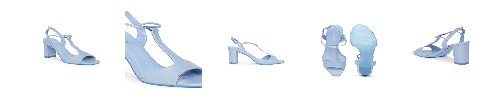

{0: {1.0: 'backstrap_BV'}, 1: {1.0: 'zipper_NBV'}, 2: {0.9978325: 'backstrap_NBV'}, 3: {1.0: 'backstrap_NBV'}, 4: {1.0: 'backstrap_NBV'}}
BV
NBV
NBV
NBV
NBV
{1.0: 'backstrap_NBV', 0.9978325: 'backstrap_NBV'}
Type of footwear =  backstrap
Best Image Index = 1
Best Image 


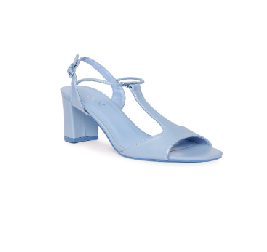

In [0]:
images = ['data/BV/backstrap/view_1-01e90b3bf103420892f98767e10bffd4.jpg',
         'data/NBV/backstrap/view_2-01e90b3bf103420892f98767e10bffd4.jpg',
         'data/NBV/backstrap/view_3-01e90b3bf103420892f98767e10bffd4.jpg',
         'data/NBV/backstrap/view_4-01e90b3bf103420892f98767e10bffd4.jpg',
         'data/NBV/backstrap/view_5-01e90b3bf103420892f98767e10bffd4.jpg']
identify_type(images , labels)